## Урок 4. Визуальный анализ данных

### Задача 1

*Постройте график  
Назовите график  
Сделайте именование оси x и оси y  
Сделайте выводы*

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

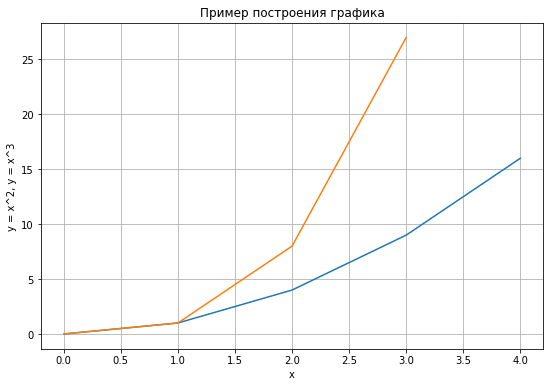

In [2]:
plt.figure(figsize = (9, 6))
plt.plot([0, 1, 2, 3, 4],[0, 1, 4, 9, 16],[0, 1, 8, 27])
plt.xlabel('x')
plt.ylabel('y = x^2, y = x^3')
plt.title('Пример построения графика')
plt.grid()

***Выводы***

*Построение графика осуществляется директивой plot, которой следует передать, как минимум один набор данных (иначе будет просто пустое поле). Если набор данных один, то он берётся за значения по оси oY, значения по оси oX при этом принимаются равными порядковым номерам значений y.  Можно задать несколько наборов данных. При этом первый набор - значения х, все остальные - y.*  
***Важно!*** *Количество значений по y, как минимум, в одном наборе наборе данных должно совпадать с количеством значений по х*  
*График можно озаглавить, можно подписать оси. Для удобства можно накинуть сетку.*

***1.1. Скачать данные по ссылке https://www.kaggle.com/datasets/esratmaria/house-price-dataset-with-other-information***

In [3]:
df = pd.read_csv("kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


***1.2 Изучите стоимости недвижимости***

In [4]:
df.agg({'price': ['min', 'mean', 'max']})

,price
min,7.500000e+04
mean,5.400881e+05
max,7.700000e+06


*В рассмариваемом наборе данных стоимость недвижимости варьируется от 75 000 до 7 700 000. Средняя цена составляет 540 088,14. Стоимость зависит от множества параметров, визуализация без дополнительных условий не допустима.*

***1.3 Изучите распределение квадратуры жилой площади***

In [5]:
df.agg({'sqft_living': ['min', 'mean', 'max']})

,sqft_living
min,290.000000
mean,2079.899736
max,13540.000000


*Минимальная жилая площадь здесь составляет 290 кв. футов, максимальная - 13 540. Среднее значение жилой площади составляет 2 079,90 кв. футов. Зависимость квадратуры жилой площади сложно логически связать с каким-либо параметром дома. Поэтому здесь можно обойтись без визуализации*

***1.4 Изучите распределение года постройки***

In [6]:
df.groupby('yr_built').agg({'yr_built': 'count'})

,yr_built
yr_built,
1900,87
1901,29
1902,27
1903,46
1904,45
...,...
2011,130
2012,170
2013,201


*Самое старое здание построено в 1900 году, самое новое - в 2015. Итого получается, что есть набор данных за 116 лет, который в табличном виде не очень-то наглядно демонстрирует распределение. Стоит построить график:*

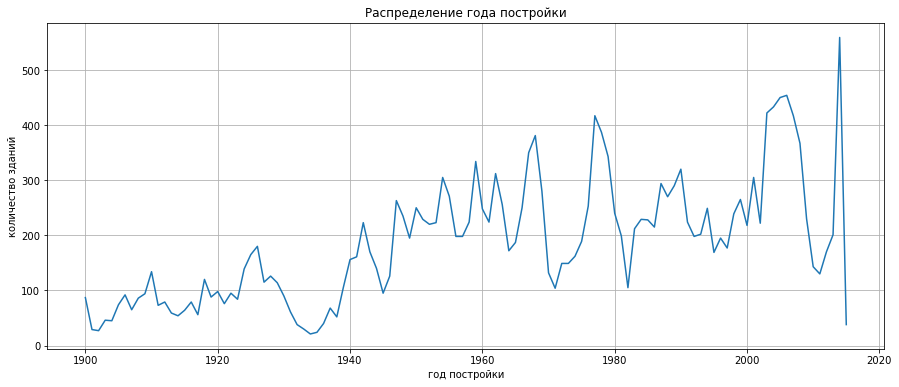

In [7]:
plt.figure(figsize = (15, 6))
plt.plot(df.groupby('yr_built').agg({'yr_built': 'count'}))
plt.xlabel('год постройки')
plt.ylabel('количество зданий')
plt.title('Распределение года постройки')
plt.grid()

*И вот здесь уже видно, что бОльшая часть зданий построена в период от, примерно, 1970 до 2015 года*

### Задача 2

***2.1 Изучите распределение домов от наличия вида на набережную  
Постройте график  
Сделайте выводы***

In [8]:
tmp = df.groupby('waterfront')['id'].count().reset_index()
tmp.head()

,waterfront,id
0,0,21450
1,1,163


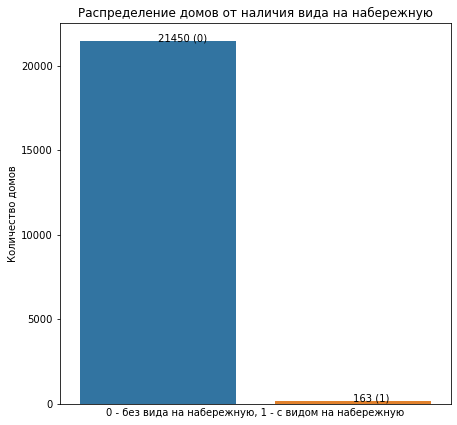

In [9]:
plt.figure(figsize = (7, 7))
plt.title('Распределение домов от наличия вида на набережную')
sns.barplot(x = tmp['waterfront'],y = tmp['id'])
plt.xlabel('0 - без вида на набережную, 1 - с видом на набережную')
plt.ylabel('Количество домов')
plt.xticks([])
for i in range(len(tmp['id'])):
        plt.text(i,tmp['id'][i],str(tmp['id'][i]) + " (" + str(tmp['waterfront'][i]) + ")");

***Выводы***

*Здесь с обычным plot можно получить линию, соединяющую два значения, что не очень информативно. Поэтому правильнее использовать bar. Просто два столбца тоже особо ни о чём не говорят (приблизительные значения), поэтому стоит подписать соответствующие им значения. По умолчанию подписи по осям содержат не только значения из выборки данных, но и промежуточные. В данном случае это сбивает с толку: по оси оХ только два значения 0 и 1. Т.к. сами столбцы подписываем, то пподписи значений по оХ убираем совсем.*  
***Выводы по самим значениям.*** *Подавляющее количество домов (21450) без вида на набережную. С видом всего 163.**

***2.2 Изучите распределение этажей домов***

In [12]:
tmp = df.groupby('floors')['id'].count().reset_index()
tmp

,floors,id
0,1.0,10680
1,1.5,1910
2,2.0,8241
3,2.5,161
4,3.0,613
5,3.5,8


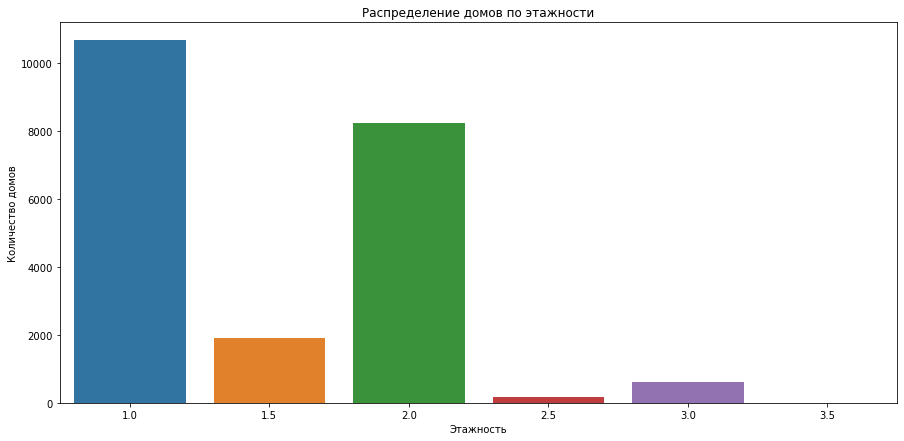

In [14]:
plt.figure(figsize = (15, 7))
plt.title('Распределение домов по этажности')
sns.barplot(x = tmp['floors'],y = tmp['id']);
plt.xlabel('Этажность')
plt.ylabel('Количество домов');

*Здесь видно, что основная часть домов одно- и двухэтажные. Немало домов этажностью 1,5 (их даже больше, чем трёхэтажных)*  
*В датасете 5 наборов данных - этажи от 1 до 3. Зданий в 3,5 этажа всего 8, поэтому на диаграмме выглядит так, что 3,5 этажа - 0 домов. Тот случай, когда подпись столбцов была бы очень кстати.*

***2.3 Изучите распределение состояния домов***

In [15]:
tmp = df.groupby('condition')['id'].count().reset_index()
tmp.head()

,condition,id
0,1,30
1,2,172
2,3,14031
3,4,5679
4,5,1701


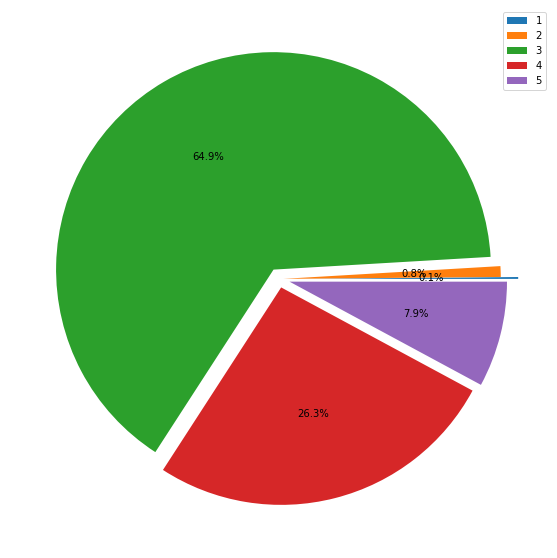

In [16]:
fig = plt.figure(figsize =(10, 10))
plt.pie(tmp['id'], explode = [0.1, 0.02, 0.05, 0.04, 0.05], autopct = '%1.1f%%')
plt.legend(tmp['condition']);

*Здесь удобно воспользоваться круговой диаграммой. Сразу видно, что больше всего домов в удовлетворительном состоянии, затем в хорошем, после - в отличном. Меньше всего домов в плохом и ужасном состояниях.*

## Задача 3

***Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.  
Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.***

*Здесь следует рассмотреть зависимость цены(price) от других параметров. Рассмотрим 5 параметров: год постройки, общая площадь дома, этажность, количество спален, класс здания*

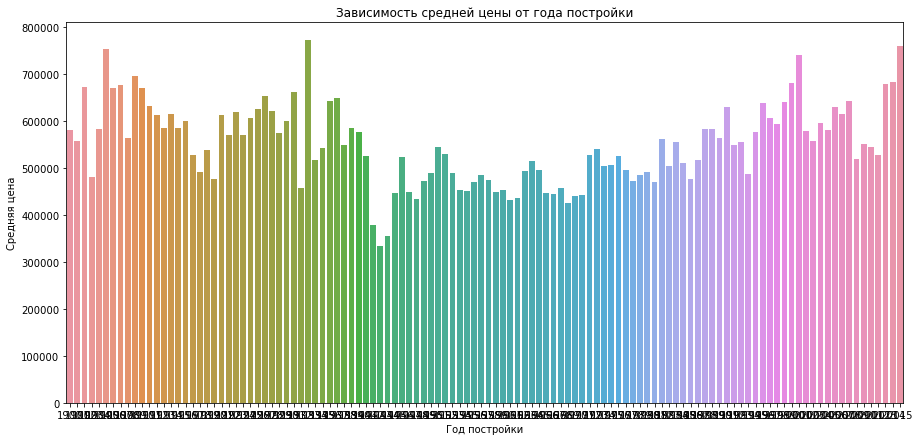

In [17]:
tmp = df.groupby('yr_built')['price'].mean().reset_index()
plt.figure(figsize = (15, 7))
plt.title('Зависимость средней цены от года постройки')
sns.barplot(x=tmp['yr_built'],y=tmp['price'])
plt.xlabel('Год постройки')
plt.ylabel('Средняя цена');

*От года постройки, как видно, средняя цена особо не зависит. Т.е. преположение о том, что чем старее здание, тем оно должно стоить дешевле (или наоборот - дороже), не состоятельно.*

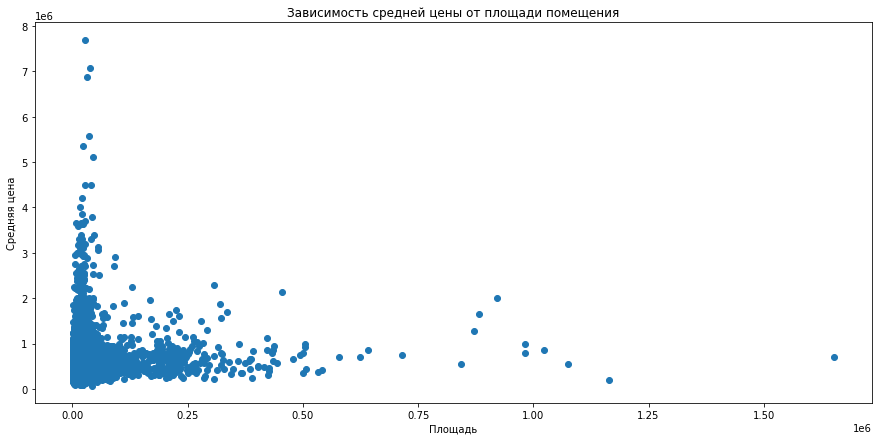

In [18]:
tmp = df.groupby('sqft_lot')['price'].mean().reset_index()
plt.figure(figsize = (15, 7))
plt.title('Зависимость средней цены от площади помещения')
plt.scatter(tmp['sqft_lot'],tmp['price'])
plt.xlabel('Площадь')
plt.ylabel('Средняя цена');

*По логике - чем больше площадь, тем цена должна быть выше. Здесь этого нет. Да, есть опредёлнная связь цены и общей площади помещения. Но не так сильно, как ожидалось*

,floors,price
0,1.0,4.421806e+05
1,1.5,5.589806e+05
2,2.0,6.488912e+05
3,2.5,1.060346e+06
4,3.0,5.825260e+05
5,3.5,9.333125e+05


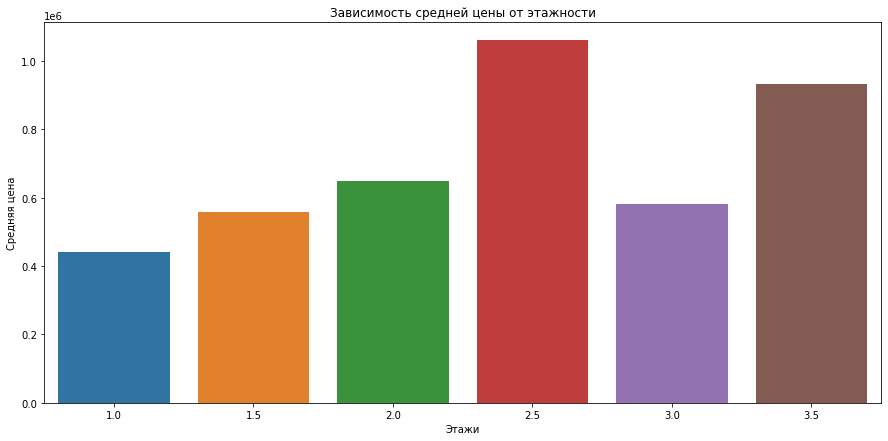

In [19]:
tmp = df.groupby('floors')['price'].mean().reset_index()
plt.figure(figsize = (15, 7))
plt.title('Зависимость средней цены от этажности')
sns.barplot(x=tmp['floors'],y=tmp['price'])
plt.xlabel('Этажи')
plt.ylabel('Средняя цена')
tmp

*Самая высокая средняя цена у домов 2,5 этажа. На втором месте - дома 3,5 этажа. Средняя цена домов 1,5 и 3 этажа примерно на одном уровне. Двухэтажные дома стоят чуть дороже 1,5 и 3 этажных. Средняя цена одноэтажных зданий самая низкая.*

,bedrooms,price
0,0,4.095038e+05
1,1,3.176429e+05
2,2,4.013727e+05
3,3,4.662321e+05
4,4,6.354195e+05
5,5,7.865998e+05
6,6,8.255206e+05
7,7,9.511847e+05
8,8,1.105077e+06
9,9,8.939998e+05


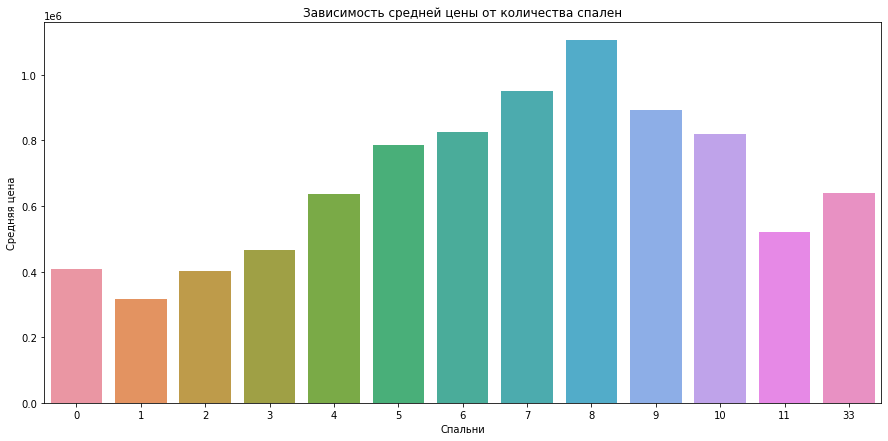

In [20]:
tmp = df.groupby('bedrooms')['price'].mean().reset_index()
plt.figure(figsize = (15, 7))
plt.title('Зависимость средней цены от количества спален')
sns.barplot(x=tmp['bedrooms'],y=tmp['price'])
plt.xlabel('Спальни')
plt.ylabel('Средняя цена')
tmp

*Дома с 8 спальнями занимают лидирующую позицию по средней стоимости. Здесь наблюдаются дома с 10,11 и даже 33 спальнями. Судя по всему речь идёт о многоквартиных домах. Если же смотреть на среднюю стоимость домов с количеством спален от 1 до 8, то здесь вполне закномерный рост цены.*

,grade,price
0,1,1.420000e+05
1,3,2.056667e+05
2,4,2.143810e+05
3,5,2.485240e+05
4,6,3.019196e+05
5,7,4.025903e+05
6,8,5.428528e+05
7,9,7.735132e+05
8,10,1.071771e+06
9,11,1.496842e+06


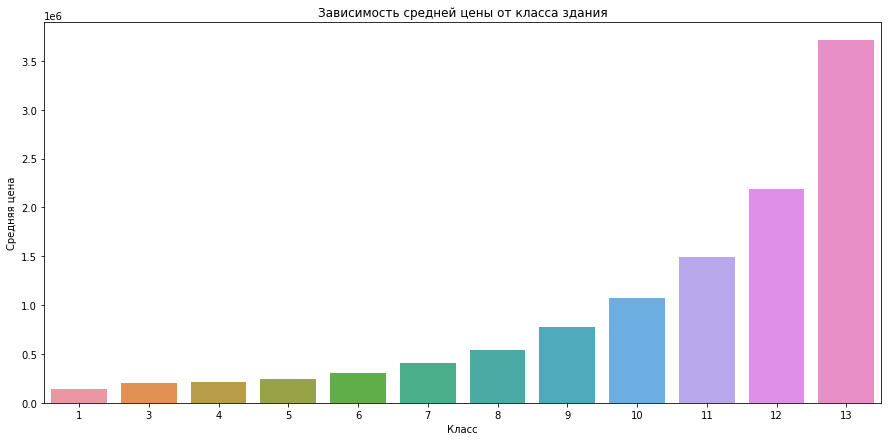

In [21]:
tmp = df.groupby('grade')['price'].mean().reset_index()
plt.figure(figsize = (15, 7))
plt.title('Зависимость средней цены от класса здания')
sns.barplot(x=tmp['grade'],y=tmp['price'])
plt.xlabel('Класс')
plt.ylabel('Средняя цена')
tmp

*В данном случае всё вполне закномерно - чем выше класс зданиё, тем выше средняя стоимость. Причём наблюдается не линейная, а экспоненциальная зависимость.*

***Общий вывод***

*Стоимость жилья формируется исходя из множества факторов, каждый из которых вносит свой вклад. В данном анализе можно однозначно сказать, что на среднюю стоимость влияет класс жилья. По другим выбранным параметрам это утверждать сложно. При этом можно провести подобный анализ в отношении класса и, скорее всего, получится, что класс более зависим от квадратуры, возраста, количества спален и т.д. И, в свою очередь, именно класс формирует стоимость.*